veri kümesi, Ames/Iowa'da ki konutların birçok yönünü açıklayan 79 değişkenden oluşmaktadır. Göreviniz bu verileri kullanarak, evlerin fiyatlarını tahmin etmek olacak.

Verileri inceleyin ve gerekli tüm verileri temizleyin.
 
Verileri araştırın ve konut fiyatlarının tahmininde faydalı olacağını düşündüğünüz bazı değişkenleri bulun.
 
Bu özellikleri kullanarak ilk modelinizi oluşturun ve OLS kullanarak parametreleri tahmin edin.

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
df["LotConfig"].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [3]:
df=house_prices_df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

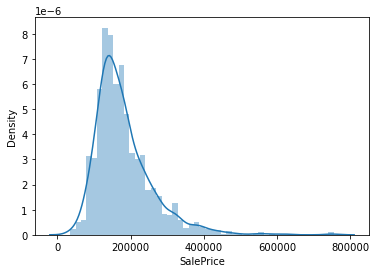

In [19]:
sns.distplot(df['SalePrice']);

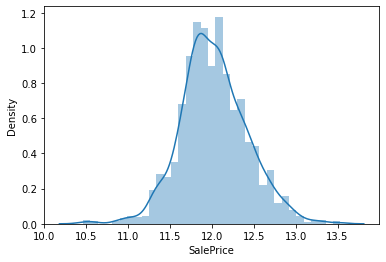

In [36]:
sns.distplot(np.log(df['SalePrice']));

In [43]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [81]:
target = np.log(df.SalePrice)

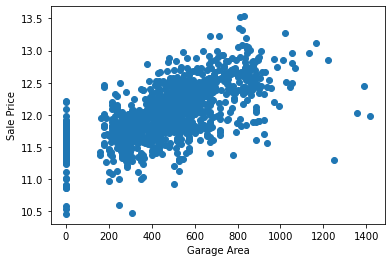

In [44]:
plt.scatter(x=df['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [40]:
categoricals = df.select_dtypes(exclude=[np.number])
#categoricals.describe()
print(categoricals.describe())

       MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1460       1460       1460  ...       1459        1460   
unique           25          9          8  ...          5           4   
top           NAmes       Norm       Norm  ...      SBrkr          TA   
freq            225       1260       1445  ...       1334         735   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1460       1379         1379       1379       1379       1460   
unique          7          6            3          5          5          3   
top           

In [87]:
df=df[["SalePrice","BldgType","YearBuilt","FullBath","BedroomAbvGr","OverallQual","GarageCars","Street","GrLivArea"]]

In [89]:
df.head(3)

,SalePrice,BldgType,YearBuilt,FullBath,BedroomAbvGr,OverallQual,GarageCars,Street,GrLivArea
0,208500,1Fam,2003,2,3,7,2,Pave,1710
1,181500,1Fam,1976,2,3,6,2,Pave,1262
2,223500,1Fam,2001,2,3,7,2,Pave,1786


In [88]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
GrLivArea,0,0.0
Street,0,0.0
GarageCars,0,0.0
OverallQual,0,0.0
BedroomAbvGr,0,0.0
FullBath,0,0.0
YearBuilt,0,0.0
BldgType,0,0.0
SalePrice,0,0.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   SalePrice        1460 non-null   int64
 1   YearBuilt        1460 non-null   int64
 2   FullBath         1460 non-null   int64
 3   BedroomAbvGr     1460 non-null   int64
 4   OverallQual      1460 non-null   int64
 5   GarageCars       1460 non-null   int64
 6   GrLivArea        1460 non-null   int64
 7   BldgType_2fmCon  1460 non-null   uint8
 8   BldgType_Duplex  1460 non-null   uint8
 9   BldgType_Twnhs   1460 non-null   uint8
 10  BldgType_TwnhsE  1460 non-null   uint8
 11  Street_Pave      1460 non-null   uint8
dtypes: int64(7), uint8(5)
memory usage: 87.1 KB


In [99]:
y = target
X = df.drop(['SalePrice'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
lr = linear_model.LinearRegression()
model = lr.fit(X, y)
print("R^2 is: \n", model.score(X, y))

R^2 is: 
 0.8146524083897065


In [100]:
print('Değişkenler: \n', lr.coef_)
print('Sabit değer (bias): \n', lr.intercept_)

Değişkenler: 
 [ 0.00310321 -0.00332767 -0.01918574  0.10844782  0.08519729  0.00027776
 -0.01526419 -0.11527005 -0.22848808 -0.10277494  0.09508533]
Sabit değer (bias): 
 4.658542805380383


In [102]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     578.6
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:31:58   Log-Likelihood:                 499.07
No. Observations:                1460   AIC:                            -974.1
Df Residuals:                    1448   BIC:                            -910.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.6585      0.422     11.047      0.000       3.831       5.486
YearBuilt           0.0031      0.000     14.218      0.000       0.003       0.004
FullBath           -0.0033      0.012     -0.272      0.786      -0.027       0.021
BedroomAbvGr       -0.0192      0.007     -2.621      0.009      -0.034      -0.005
OverallQual         0.1084      0.005     20.214      0.000       0.098       0.119
GarageCars          0.0852      0.008     10.244      0.000       0.069       0.102
GrLivArea           0.0003   1.47e-05     18.929      0.000       0.000       0.000
BldgType_2fmCon    -0.0153      0.032     -0.470      0.638      -0.079       0.048
BldgType_Duplex    -0.1153      0.026     -4.485      0.000      -0.166      -0.065
BldgType_Twnhs     -0.2285      0.027     -8.321      0.000      -0.282      -0.175
BldgType_TwnhsE    -0.1028      0.019     -5.533      0.000      -0.139      -0.066
Street_Pave         0.0951      0.072      1.329      0.184      -0.045       0.235
==============================================================================
Omnibus:                      637.371   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10340.008
Skew:                          -1.603   Prob(JB):                         0.00
Kurtosis:                      15.637   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""